In [1]:
import pandas as pd

df = pd.read_csv('SpeechCraft_final_df.csv')

df.head()

,sid,audio_path,Gender,Age,Speed,Pitch,Energy,Emotion,Category,Transcript,Des,Ins
0,YOU0000004134_S0000088,/home/nas4/DB/gigaspeech/data/audio/m_files_ad...,female,Elderly,normal,normal,high,sad,Education,TWO-THIRDS OF THE VEHICLES THE EPA TESTS THEMS...,Sharing a heartfelt observation in the field o...,Sharing a heartfelt observation in the field o...
1,POD0000012099_S0000074,/home/nas4/DB/gigaspeech/data/audio/m_files_ad...,male,Elderly,slow,normal,high,sad,News and Politics,THE DISEASES FOR WHICH THERE ARE PREVENTIVE ME...,Speaking with a slow pace and a hint of sadnes...,Speaking with a slow pace and a hint of sadnes...
2,POD0000003784_S0000084,/home/nas4/DB/gigaspeech/data/audio/m_files_ad...,female,Middle-aged,normal,high,high,happy,News and Politics,AND THEY'RE MORE CAUTIOUS WENDY WAS ABLE TO CO...,"Happily states an adult female, high-pitched a...","""AND THEY'RE MORE CAUTIOUS WENDY WAS ABLE TO C..."
3,YOU0000012125_S0000863,/home/nas4/DB/gigaspeech/data/audio/m_files_ad...,female,Young Adult,slow,high,low,neutral,News and Politics,I KNOW <PERIOD>,Reflecting on a topic in the realm of News and...,Reflecting on a topic in the realm of News and...
4,POD0000003364_S0000299,/home/nas4/DB/gigaspeech/data/audio/m_files_ad...,male,Teenager,fast,normal,high,happy,News and Politics,IT'S TIME YOU GOT TOGETHER I R L <PERIOD> YOU ...,Expressing happiness in the realm of News and ...,Expressing happiness in the realm of News and ...


In [2]:
# sid 중복 확인
duplicate_sids = df[df.duplicated('sid', keep=False)]
if not duplicate_sids.empty:
    print("중복된 sid 발견:")
    print(duplicate_sids[['sid']])
else:
    print("sid 중복 없음")


sid 중복 없음


In [ ]:
# 각 항목 개수 및 비어있는 값 추출 (예시: Age 컬럼)

# 주요 값별 개수 세기 (예시: Age 컬럼)
check = 'Category'

unique = df[check].dropna().unique()
print(f"{check} 컬럼의 고유값 목록:")
print(unique)

counts = df[check].value_counts(dropna=False)
print(f"\n{check} 컬럼의 개별 항목별 개수:")
print(counts)

# 비어있는 값 개수
num_empty = df[check].isnull().sum() + (df[check] == '').sum()
print(f"\n{check} 컬럼의 비어있는 값 개수: {num_empty}")

Category 컬럼의 고유값 목록:
['Education' 'News and Politics' 'News  and  Politics' 'Business'
 'People  and  Blogs' 'Nonprofits  and  Activism' 'Entertainment'
 'History' 'Science and Technology' 'Science  and  Technology'
 'Howto  and  Style' 'Crime' 'People and Blogs' 'Health and Fitness'
 'Music' 'Society and Culture' 'Film  and  Animation' 'Arts'
 'Travel  and  Events' 'Comedy' 'Gaming' 'Sports' 'Kids and Family'
 'Autos  and  Vehicles' 'Travel and Events' 'Leisure' 'Pets  and  Animals'
 'audiobook']

Category 컬럼의 개별 항목별 개수:
Category
audiobook                    189337
News and Politics            141281
Education                    115591
Entertainment                 27883
News  and  Politics           27830
People  and  Blogs            23576
Science  and  Technology      21583
Science and Technology        16888
Nonprofits  and  Activism     16485
Crime                         14599
Howto  and  Style             13435
Health and Fitness            11343
People and Blogs               

In [11]:
# 각 항목 개수 및 비어있는 값 추출 (예시: Age 컬럼)

# 주요 값별 개수 세기 (예시: Age 컬럼)
check = 'Transcript'

# 비어있는 값 개수
num_empty = df[check].isnull().sum() + (df[check] == '').sum()
print(f"\n{check} 컬럼의 비어있는 값 개수: {num_empty}")


Transcript 컬럼의 비어있는 값 개수: 0


In [12]:
# 각 항목 개수 및 비어있는 값 추출 (예시: Age 컬럼)

# 주요 값별 개수 세기 (예시: Age 컬럼)
check = 'Des'

# 비어있는 값 개수
num_empty = df[check].isnull().sum() + (df[check] == '').sum()
print(f"\n{check} 컬럼의 비어있는 값 개수: {num_empty}")


Des 컬럼의 비어있는 값 개수: 0


In [13]:
# 각 항목 개수 및 비어있는 값 추출 (예시: Age 컬럼)

# 주요 값별 개수 세기 (예시: Age 컬럼)
check = 'Ins'

# 비어있는 값 개수
num_empty = df[check].isnull().sum() + (df[check] == '').sum()
print(f"\n{check} 컬럼의 비어있는 값 개수: {num_empty}")


Ins 컬럼의 비어있는 값 개수: 0


/tmp/ipykernel_1408756/3716643726.py:11: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


Loading CSV: SpeechCraft_final_df.csv


Audio Length Stat (fast): 100%|██████████| 670067/670067 [15:12<00:00, 733.92it/s]  


오디오 길이(초) 통계:
샘플 개수: 670067
최소: 0.50초
최대: 20.00초
평균: 3.97초
중앙값: 3.23초
표준편차: 2.77초


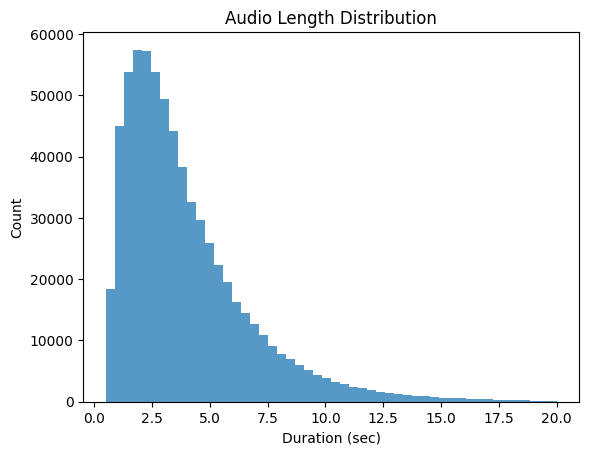

In [2]:
# 오디오 길이 통계 (멀티프로세싱으로 속도 개선)

import pandas as pd
import torchaudio
from tqdm import tqdm
import numpy as np
import concurrent.futures

# 빠른 torchaudio 설정 (libsox 대신 soundfile backend 강제)
try:
    torchaudio.set_audio_backend("soundfile")
except Exception:
    pass

# CSV Load
csv_file = "SpeechCraft_final_df.csv"
print(f"Loading CSV: {csv_file}")
df = pd.read_csv(csv_file)

def get_duration(row):
    audio_path = row['audio_path']
    sid = row['sid']
    try:
        info = torchaudio.info(audio_path)
        duration = info.num_frames / info.sample_rate
        return (sid, duration, None)
    except Exception as e:
        return (sid, None, e)

lengths_sec = []
failed_sid = []

rows = df[['sid', 'audio_path']].to_dict('records')

# 멀티프로세싱(map)으로 빠르게 처리 (CPU 수 제한 가능)
with concurrent.futures.ProcessPoolExecutor(max_workers=8) as executor:
    results = list(tqdm(executor.map(get_duration, rows), total=len(rows), desc="Audio Length Stat (fast)"))

for sid, duration, error in results:
    if duration is not None:
        lengths_sec.append(duration)
    else:
        failed_sid.append(sid)
        print(f"Sample {sid} failed: {error}")

lengths_sec = np.array(lengths_sec)
print("오디오 길이(초) 통계:")
print(f"샘플 개수: {len(lengths_sec)}")
print(f"최소: {lengths_sec.min():.2f}초")
print(f"최대: {lengths_sec.max():.2f}초")
print(f"평균: {lengths_sec.mean():.2f}초")
print(f"중앙값: {np.median(lengths_sec):.2f}초")
print(f"표준편차: {lengths_sec.std():.2f}초")

# 히스토그램 시각화 (옵션)
try:
    import matplotlib.pyplot as plt
    plt.hist(lengths_sec, bins=50, alpha=0.75)
    plt.xlabel('Duration (sec)')
    plt.ylabel('Count')
    plt.title('Audio Length Distribution')
    plt.show()
except ImportError:
    print("matplotlib이 설치되어 있지 않아 히스토그램을 출력하지 않습니다.")

if failed_sid:
    print(f"오류 (불러오기 실패) 샘플 수: {len(failed_sid)}")
    print(f"실패한 sid 목록: {failed_sid}")